# Reinforcement  project :

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ST
import numpy as np
import math

In [4]:
A = pd.read_csv("heart.csv")
A

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
A.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
A.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:

B = A.rename(columns={"ChestPainType" : "ChestPain", "RestingBP" : "BP", "FastingBS" : "Blood_Sugar", "RestingECG" : "ECG", "MaxHR" : "HR"})
B

,Age,Sex,ChestPain,BP,Cholesterol,Blood_Sugar,ECG,HR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
C = B.drop("ST_Slope", axis = 1)
C

,Age,Sex,ChestPain,BP,Cholesterol,Blood_Sugar,ECG,HR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,1


In [10]:
C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPain       918 non-null    object 
 3   BP              918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   Blood_Sugar     918 non-null    int64  
 6   ECG             918 non-null    object 
 7   HR              918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 79.0+ KB


In [11]:
C["ExerciseAngina"]=C["ExerciseAngina"].map({'Y' : 'YES', 'N' : 'NO'})
C

,Age,Sex,ChestPain,BP,Cholesterol,Blood_Sugar,ECG,HR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,NO,0.0,0
1,49,F,NAP,160,180,0,Normal,156,NO,1.0,1
2,37,M,ATA,130,283,0,ST,98,NO,0.0,0
3,48,F,ASY,138,214,0,Normal,108,YES,1.5,1
4,54,M,NAP,150,195,0,Normal,122,NO,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,NO,1.2,1
914,68,M,ASY,144,193,1,Normal,141,NO,3.4,1
915,57,M,ASY,130,131,0,Normal,115,YES,1.2,1
916,57,F,ATA,130,236,0,LVH,174,NO,0.0,1


## Exploratory Data Analysis
- To analyse the structure  and pattern 
- To analyse the relationshiip between the variables

# Univariet analysis
Univariate analysis explores one variable at a time 


# Interpretation
-Most ages fall between 40 and 65 years, indicating that middle-aged individuals are the most common in the dataset.

-Median age is around 55 years, showing that the majority of patients are in the higher risk age group for heart issues.

## Histogram
- To analyze the Chart

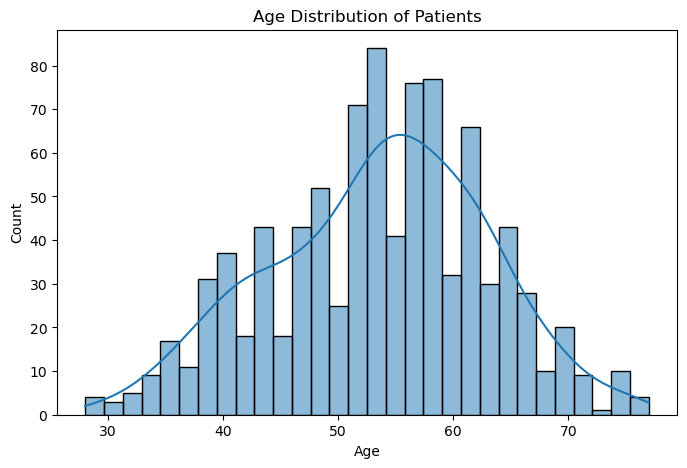

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(C['Age'], kde=True, bins=30)
plt.title("Age Distribution of Patients")
plt.show()


-The patient population is heavily concentrated in the mid-50s, with the median age being 54.00 and the mean age at 53.51. This shows the dataset primarily focuses on middle-aged to older adults, which are typically high-risk groups for heart disease.

## Count plot
- Shows the frequency of each category
- Used to analyse the comparisson across the group 


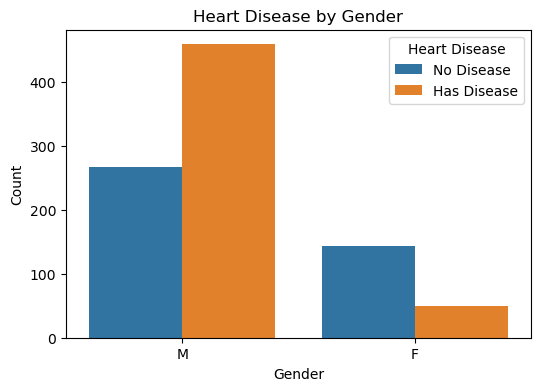

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="HeartDisease", data=C)
plt.title("Heart Disease by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No Disease", "Has Disease"])
plt.show()



- There is a strong gender bias in the occurrence of heart disease in this dataset. Males (M) have a significantly higher disease rate (≈63.17%) compared to females (F), who have a rate of only ≈25.91%.
- The countplot also highlights a demographic imbalance: the dataset contains 725 male patients vs. 193 female patients. This heavy over-representation of males should be kept in mind when interpreting overall heart disease frequency.

## Heat map 
- It is used to compare multiple variable at once  
- It reveals the patterns across simensions

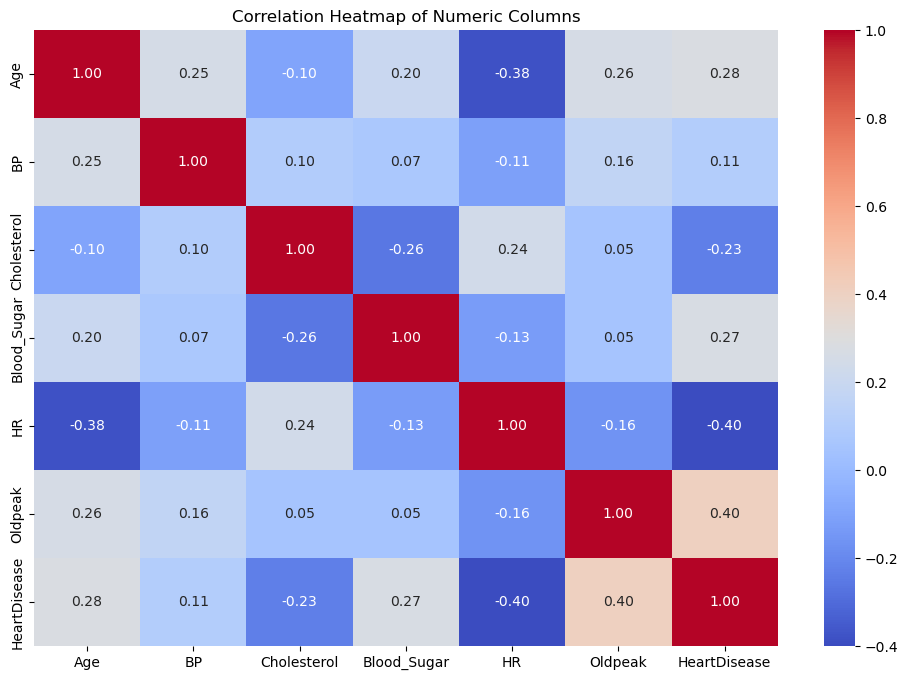

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(C.corr(numeric_only=True), annot=True, cmap="coolwarm",fmt='.2f')
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()



-(Maximum Heart Rate) has the strongest negative correlation (−0.40). This suggests that patients who cannot achieve a high maximum heart rate during exercise are significantly more likely to have heart disease.

## Barplot 
- Bar plots compare values across categories.
- ar plots effectively visualize and compare categories.

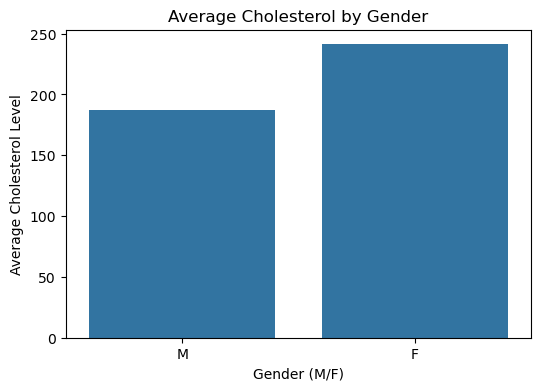

In [15]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Cholesterol", data=C, errorbar=None)
plt.title("Average Cholesterol by Gender")
plt.xlabel("Gender (M/F)")
plt.ylabel("Average Cholesterol Level")
plt.show()


-Female patients have a higher average Cholesterol level (≈241.20) than male patients (≈187.51).

## Scatter plot
- Shows relationship between two variables.
-  Easily identifies data trends or clusters.

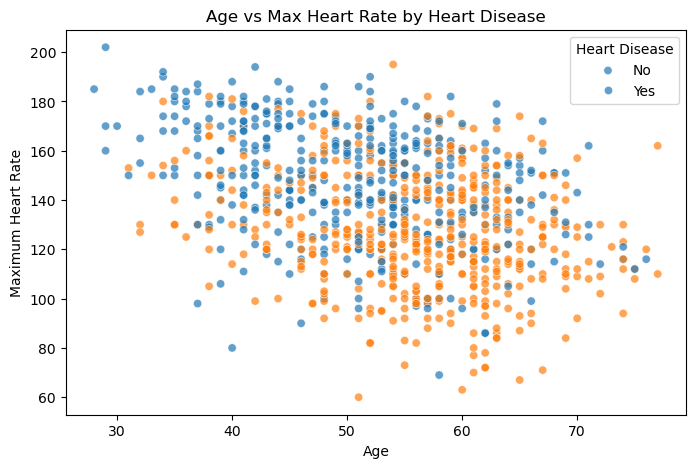

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="HR", hue="HeartDisease", data=C, alpha=0.7)
plt.title("Age vs Max Heart Rate by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


- Patients diagnosed with heart disease (HeartDisease=1) have a much lower average maximum heart rate (≈127.66 BPM) compared to healthy patients (≈148.15 BPM).
-The scatterplot would visually confirm that cases of heart disease tend to cluster in the region defined by higher age and lower maximum heart rate, confirming that age and low exercise capacity are dual risk factors.

# OUTLIERS :-

## Box plot
- Used to spot the outliers

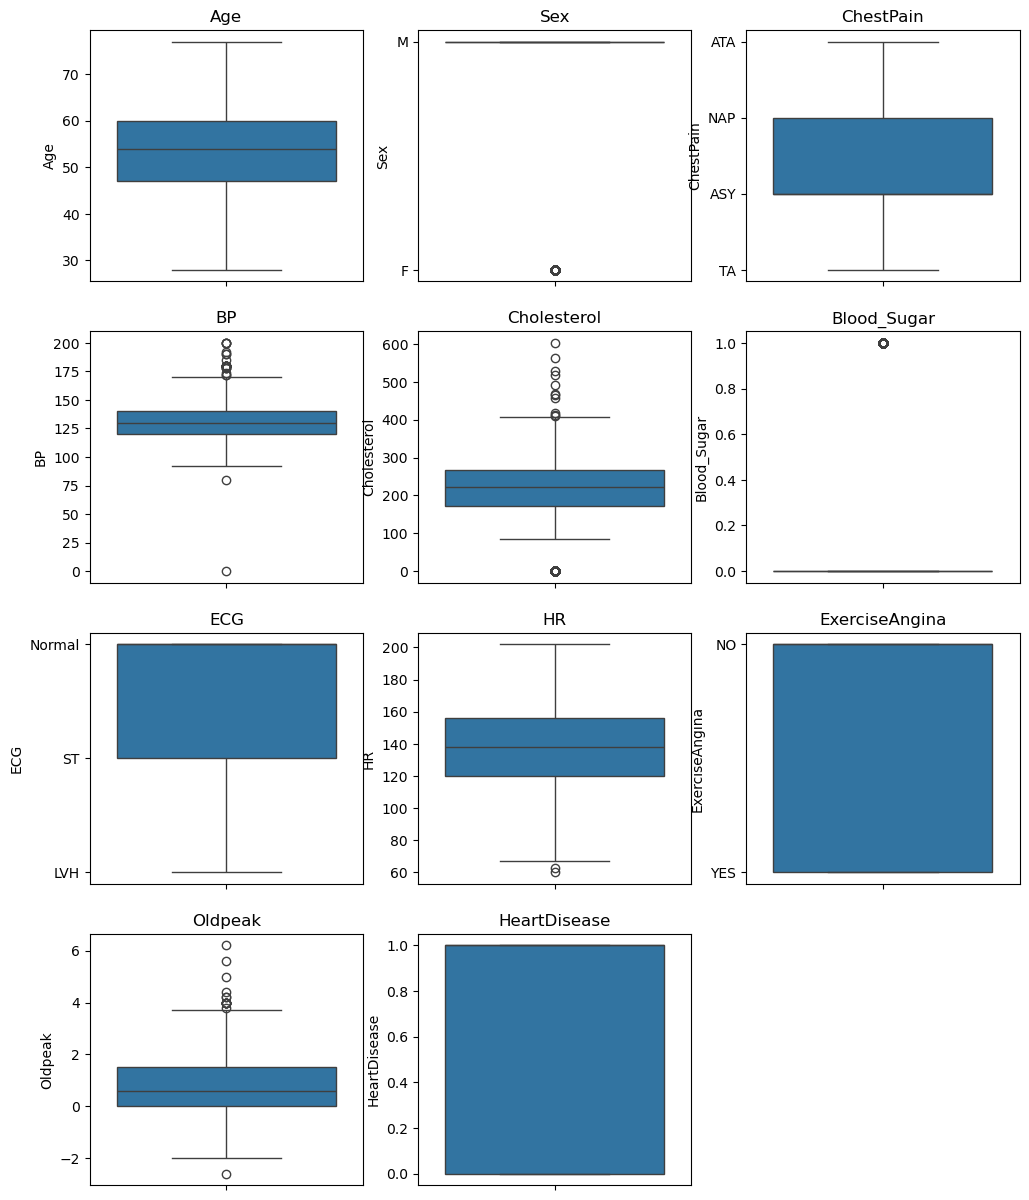

In [17]:
plt.figure(figsize=(12,15))
n_cols = 3
n_rows = math.ceil(len(C.columns) / n_cols)
for i in range(len(C.columns)):
    plt.subplot(n_rows,n_cols,i+1)
    sns.boxplot(y=C[C.columns[i]])
    plt.title(C.columns[i])
plt.show()    

# Interpretation 
-Outliers: While Age and MaxHR are largely free of outliers, the variables Cholesterol (with 183 cases) and RestingBP (with 28 cases) show a significant presence of extreme values that warrant further investigation.

Age: The central 50% of patients fall between 47.5 and 60.5 years old. The median age is 54 years, which is typical for a population being screened for heart disease.

Resting Blood Pressure (RestingBP): The middle half of blood pressure readings range from 120 to 140 mmHg. The median resting BP is 130 mmHg, suggesting that the average patient in the dataset is on the higher end of a normal blood pressure range.

Cholesterol: The bulk of cholesterol values fall between 176 and 270 mg/dl. The median cholesterol is 223 mg/dl, indicating a generally high central level for the patient group.

Maximum Heart Rate (MaxHR): Maximum achieved heart rates mostly range from 120 to 156 BPM. The median MaxHR is 138 BPM, showing the average peak cardiac performance during exercise.

In [16]:
Q1 = C["Age"].quantile(0.25)
Q3 = C["Age"].quantile(0.75)
IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3-(1.5*IQR)
print("Q1",Q1)
print("Q3:",Q3)
print("IQR:",IQR)
print("Min:",Min)
print("Max:",Max)

Q1 47.0
Q3: 60.0
IQR: 13.0
Min: 27.5
Max: 40.5


In [17]:
C = C[C["Age"]>25]
C = C[C["Age"]<65]
C

,Age,Sex,ChestPain,BP,Cholesterol,Blood_Sugar,ECG,HR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,NO,0.0,0
1,49,F,NAP,160,180,0,Normal,156,NO,1.0,1
2,37,M,ATA,130,283,0,ST,98,NO,0.0,0
3,48,F,ASY,138,214,0,Normal,108,YES,1.5,1
4,54,M,NAP,150,195,0,Normal,122,NO,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,YES,0.2,1
913,45,M,TA,110,264,0,Normal,132,NO,1.2,1
915,57,M,ASY,130,131,0,Normal,115,YES,1.2,1
916,57,F,ATA,130,236,0,LVH,174,NO,0.0,1


In [20]:
C.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 18 to 832
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             49 non-null     int64  
 1   Sex             49 non-null     object 
 2   ChestPain       49 non-null     object 
 3   BP              49 non-null     int64  
 4   Cholesterol     49 non-null     int64  
 5   Blood_Sugar     49 non-null     int64  
 6   ECG             49 non-null     object 
 7   HR              49 non-null     int64  
 8   ExerciseAngina  49 non-null     object 
 9   Oldpeak         49 non-null     float64
 10  HeartDisease    49 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 4.6+ KB


In [31]:
# Select only numerical columns
num_cols = C[['Age','BP','Cholesterol','HR','Oldpeak']]

# Display the selected columns
num_cols.head()


,Age,BP,Cholesterol,HR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [32]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))
num_outliers = num_cols[outliers]
num_outliers = num_outliers.dropna(how='all')  # drop rows with no outliers
num_outliers


,Age,BP,Cholesterol,HR,Oldpeak
28,NaN,NaN,468.0,NaN,NaN
30,NaN,NaN,518.0,NaN,NaN
68,NaN,NaN,NaN,NaN,4.0
69,NaN,NaN,412.0,NaN,NaN
76,NaN,NaN,529.0,NaN,NaN
...,...,...,...,...,...
850,NaN,NaN,NaN,NaN,6.2
855,NaN,180.0,NaN,NaN,NaN
880,NaN,172.0,NaN,NaN,NaN
900,NaN,NaN,NaN,NaN,4.4


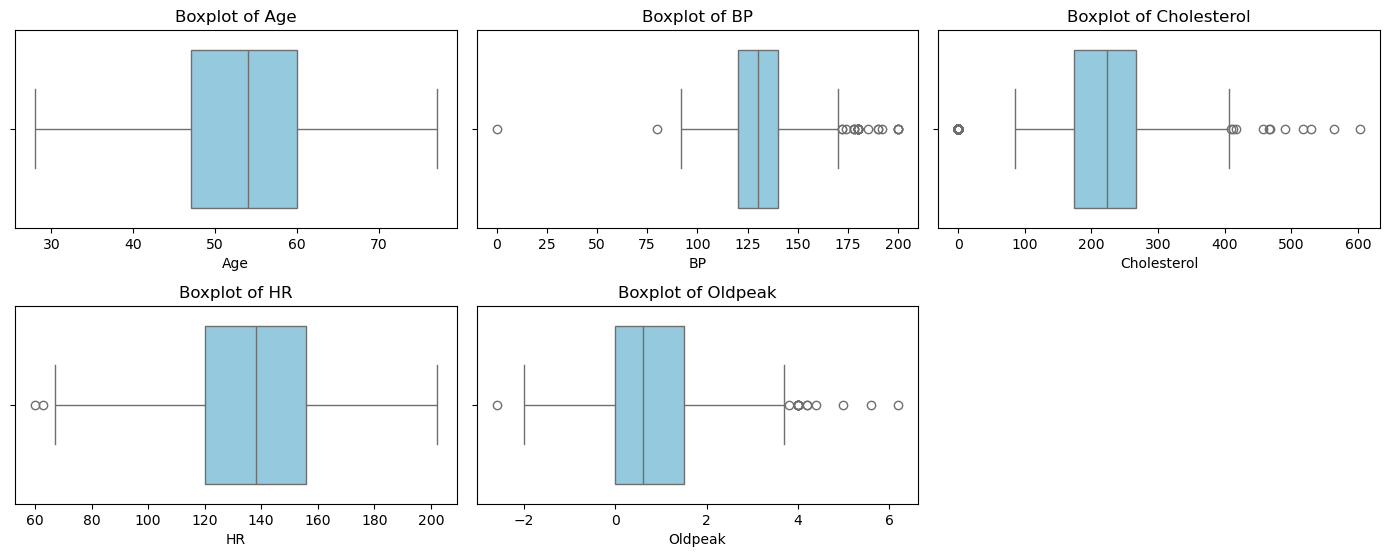

In [33]:
plt.figure(figsize=(14,8))
for i, col in enumerate(num_cols.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=num_cols[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# Test statistics 

# T - Test
- The T-Test is a parametric test used to determine if there is a statistically significant difference between the means of two independent groups on a single numerical variable.
- Result: Significant Difference (p=0.000)

- Conclusion: The low p-value indicates that the difference in average cholesterol you observed between genders is not due to chance. Females have a significantly different (and higher) mean cholesterol level than males.

In [24]:
from scipy.stats import ttest_ind

male = C[C['Sex'] == 'M']['Cholesterol']
female = C[C['Sex'] == 'F']['Cholesterol']

stat, p = ttest_ind(male, female)
print("T-test: Statistics=%.3f, p=%.3f" % (stat, p))

if p < 0.05:
    print(" Significant difference between male and female cholesterol")
else:
    print(" No significant difference")


T-test: Statistics=-6.181, p=0.000
 Significant difference between male and female cholesterol


# One Way Annova
- ANOVA is a parametric test used to determine if there are any statistically significant differences between the means of three or more independent groups on a single numerical variable.
- Result: No Significant Difference (p=0.113)

- Conclusion: Since the p-value is greater than the standard 0.05 threshold, you do not have sufficient evidence to say that the average resting blood pressure is significantly different across the various types of chest pain.

In [20]:
from scipy.stats import f_oneway

groups = [group['BP'].values for name, group in C.groupby('ChestPain')]
stat, p = f_oneway(*groups)
print("ANOVA p-value:", p)
if p < 0.05:
    print(" Significant difference between Chest Pain groups")
else:
    print(" No significant difference")



ANOVA p-value: 0.1126206029406595
❌ No significant difference


# Chi-Square Test
- The Chi-Square Test is a non-parametric test used to determine if there is a statistically significant relationship or association between two categorical variables.
- Result: Significant Relationship (p=4.59e−20)

- Conclusion: The extremely low p-value confirms that there is a strong, statistically significant association between a person's gender and the likelihood of them having heart disease in this dataset.

In [22]:
from scipy.stats import chi2_contingency
import pandas as pd

table = pd.crosstab(C['Sex'], C['HeartDisease'])
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-Square p-value:", p)
if p < 0.05:
    print(" Significant relationship between Gender and Heart Disease")
else:
    print(" No relationship found")


Chi-Square p-value: 4.597617450809164e-20
✅ Significant relationship between Gender and Heart Disease
